In [1]:
import numpy as np
import uproot
import math
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
mltree = uproot.open( "mltree.root:Stg" )

In [3]:
mltree.keys()

['n',
 'x',
 'y',
 'z',
 'tid',
 'vid',
 'hpt',
 'hsv',
 'nt',
 'pt',
 'eta',
 'phi',
 'rnt',
 'rpt',
 'reta',
 'rphi',
 'rtid',
 'Crit2_RZRatio',
 'Crit2_RZRatio_trackIds',
 'Crit2_DeltaPhi',
 'Crit2_DeltaPhi_trackIds',
 'Crit2_DeltaRho',
 'Crit2_DeltaRho_trackIds',
 'Crit2_StraightTrackRatio',
 'Crit2_StraightTrackRatio_trackIds',
 'Crit3_3DAngle',
 'Crit3_3DAngle_trackIds',
 'Crit3_PT',
 'Crit3_PT_trackIds',
 'Crit3_ChangeRZRatio',
 'Crit3_ChangeRZRatio_trackIds',
 'Crit3_2DAngle',
 'Crit3_2DAngle_trackIds']

In [4]:
hit_obs = mltree.arrays( ["x", "y", "z", "tid"], library="pd")

In [5]:
hit_obs

x          y           z  tid
entry subentry                                       
0     0          7.144989   7.470652  280.904999   14
      1        -24.717182 -41.595303  280.904999  153
      2        -31.096756 -47.115570  280.704987  155
      3        -31.104008 -47.125748  280.785004  155
      4        -44.744919 -39.399109  280.904999  207
...                   ...        ...         ...  ...
49    20        22.918476  16.044197  349.404999  538
      21         7.532181  30.398239  349.404999  571
      22        28.764618   3.969466  349.404999  509
      23        21.867645  -1.017869  349.404999  523
      24        13.936875  -1.480761  349.404999  530

[2018 rows x 4 columns]

In [12]:
Crit2 = mltree.arrays( ["Crit2_RZRatio", "Crit2_RZRatio_trackIds", 
                        "Crit2_DeltaRho", "Crit2_DeltaRho_trackIds", 
                        "Crit2_DeltaPhi", "Crit2_DeltaPhi_trackIds", 
                        "Crit2_StraightTrackRatio", "Crit2_StraightTrackRatio_trackIds"] , library="pd")
Crit3 = mltree.arrays( ["Crit3_3DAngle", "Crit3_3DAngle_trackIds", 
                        "Crit3_ChangeRZRatio", "Crit3_ChangeRZRatio_trackIds", 
                        "Crit3_2DAngle", "Crit3_2DAngle_trackIds"] , library="pd")

In [13]:
Crit2

Crit2_RZRatio  Crit2_RZRatio_trackIds  Crit2_DeltaRho  \
entry subentry                                                          
0     0              1.000643                      14        0.817246   
      1              2.786553                      -1      -37.230370   
      2              3.098523                      -1      -45.297874   
      3              3.108731                      -1      -45.310364   
      4              3.259845                      -1      -48.464134   
...                       ...                     ...             ...   
49    129            1.015485                      -1        2.144346   
      130            1.015920                     530        2.270461   
      131            1.016991                      -1        2.112258   
      132            1.016028                      -1        2.315497   
      133            1.019166                      -1        2.289415   

                Crit2_DeltaRho_trackIds  Crit2_DeltaPhi  \
entry subentry                                            
0     0                              14        0.149045   
      1                              -1      166.847458   
      2                              -1      169.552612   
      3                              -1      169.553070   
      4                              -1      175.237396   
...                                 ...             ...   
49    129                            -1       15.190105   
      130                           530       15.207500   
      131                            -1       16.264538   
      132                            -1       15.175061   
      133                            -1       17.304035   

                Crit2_DeltaPhi_trackIds  Crit2_StraightTrackRatio  \
entry subentry                                                      
0     0                              14                  0.998049   
      1                              -1                  0.213232   
      2                              -1                  0.182629   
      3                              -1                  0.182641   
      4                              -1                  0.173053   
...                                 ...                       ...   
49    129                            -1                  1.103597   
      130                           530                  1.115447   
      131                            -1                  1.100622   
      132                            -1                  1.119741   
      133                            -1                  1.117250   

                Crit2_StraightTrackRatio_trackIds  
entry subentry                                     
0     0                                        14  
      1                                        -1  
      2                                        -1  
      3                                        -1  
      4                                        -1  
...                                           ...  
49    129                                      -1  
      130                                     530  
      131                                      -1  
      132                                      -1  
      133                                      -1  

[21781 rows x 8 columns]

In [14]:
Crit3

Crit3_3DAngle  Crit3_3DAngle_trackIds  Crit3_ChangeRZRatio  \
entry subentry                                                               
0     0              0.061588                      14             0.999984   
      1              1.395637                      -1             0.999854   
      2              0.516331                      -1             0.999785   
      3              1.025016                      -1             0.999744   
      4              9.476799                      -1             0.990084   
...                       ...                     ...                  ...   
49    6              1.253880                      -1             1.000202   
      7             78.985397                      -1             0.290433   
      8             78.697838                      -1             0.295036   
      9              0.225430                     425             1.000251   
      10             0.850488                      -1             1.001606   

                Crit3_ChangeRZRatio_trackIds  Crit3_2DAngle  \
entry subentry                                                
0     0                                   14       1.563262   
      1                                   -1      37.181984   
      2                                   -1      10.801071   
      3                                   -1      26.065329   
      4                                   -1      70.357468   
...                                      ...            ...   
49    6                                   -1       9.390012   
      7                                   -1      42.857475   
      8                                   -1      43.033520   
      9                                  425       1.619185   
      10                                  -1       1.938722   

                Crit3_2DAngle_trackIds  
entry subentry                          
0     0                             14  
      1                             -1  
      2                             -1  
      3                             -1  
      4                             -1  
...                                ...  
49    6                             -1  
      7                             -1  
      8                             -1  
      9                            425  
      10                            -1  

[10154 rows x 6 columns]

In [17]:
hit2_obs = {}
hit2_obs['true'] = Crit2[['Crit2_RZRatio', 'Crit2_DeltaRho', 'Crit2_DeltaPhi', 'Crit2_StraightTrackRatio']][Crit2.Crit2_DeltaPhi_trackIds != -1]
hit2_obs['false'] = Crit2[['Crit2_RZRatio', 'Crit2_DeltaRho', 'Crit2_DeltaPhi', 'Crit2_StraightTrackRatio']][Crit2.Crit2_DeltaPhi_trackIds == -1]

In [19]:
hit3_obs = {}
hit3_obs['true'] = Crit3[['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle']][Crit3.Crit3_3DAngle_trackIds != -1]
hit3_obs['false'] = Crit3[['Crit3_3DAngle', 'Crit3_ChangeRZRatio', 'Crit3_2DAngle']][Crit3.Crit3_3DAngle_trackIds == -1]

In [21]:
from matplotlib.patches import Rectangle
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

array([[<AxesSubplot:xlabel='Crit2_RZRatio', ylabel='Crit2_RZRatio'>,
        <AxesSubplot:xlabel='Crit2_DeltaRho', ylabel='Crit2_RZRatio'>,
        <AxesSubplot:xlabel='Crit2_DeltaPhi', ylabel='Crit2_RZRatio'>,
        <AxesSubplot:xlabel='Crit2_StraightTrackRatio', ylabel='Crit2_RZRatio'>],
       [<AxesSubplot:xlabel='Crit2_RZRatio', ylabel='Crit2_DeltaRho'>,
        <AxesSubplot:xlabel='Crit2_DeltaRho', ylabel='Crit2_DeltaRho'>,
        <AxesSubplot:xlabel='Crit2_DeltaPhi', ylabel='Crit2_DeltaRho'>,
        <AxesSubplot:xlabel='Crit2_StraightTrackRatio', ylabel='Crit2_DeltaRho'>],
       [<AxesSubplot:xlabel='Crit2_RZRatio', ylabel='Crit2_DeltaPhi'>,
        <AxesSubplot:xlabel='Crit2_DeltaRho', ylabel='Crit2_DeltaPhi'>,
        <AxesSubplot:xlabel='Crit2_DeltaPhi', ylabel='Crit2_DeltaPhi'>,
        <AxesSubplot:xlabel='Crit2_StraightTrackRatio', ylabel='Crit2_DeltaPhi'>],
       [<AxesSubplot:xlabel='Crit2_RZRatio', ylabel='Crit2_StraightTrackRatio'>,
        <AxesSubplot:xlabel='

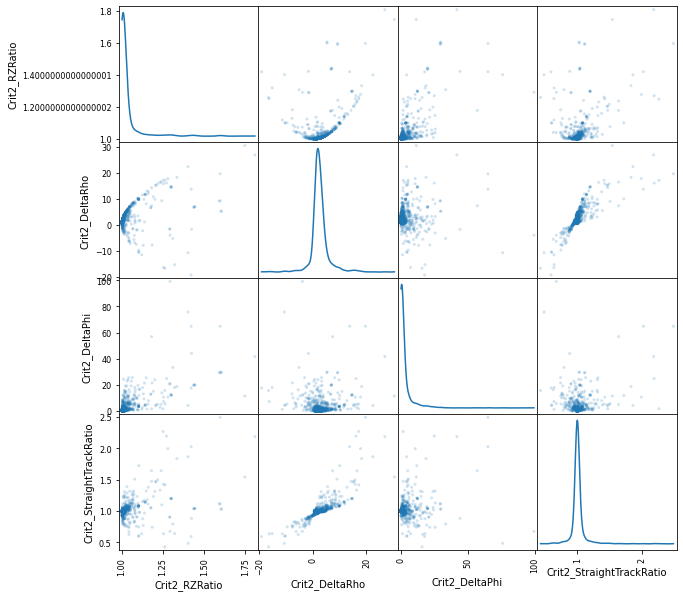

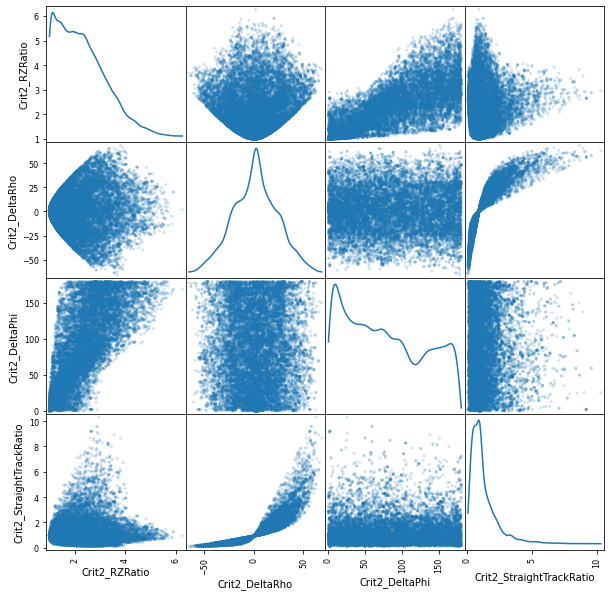

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(hit2_obs['true'], alpha=0.2, figsize=(10, 10), diagonal='kde')
scatter_matrix(hit2_obs['false'], alpha=0.2, figsize=(10, 10), diagonal='kde')

-- creating a 4x4 matrix of plots --


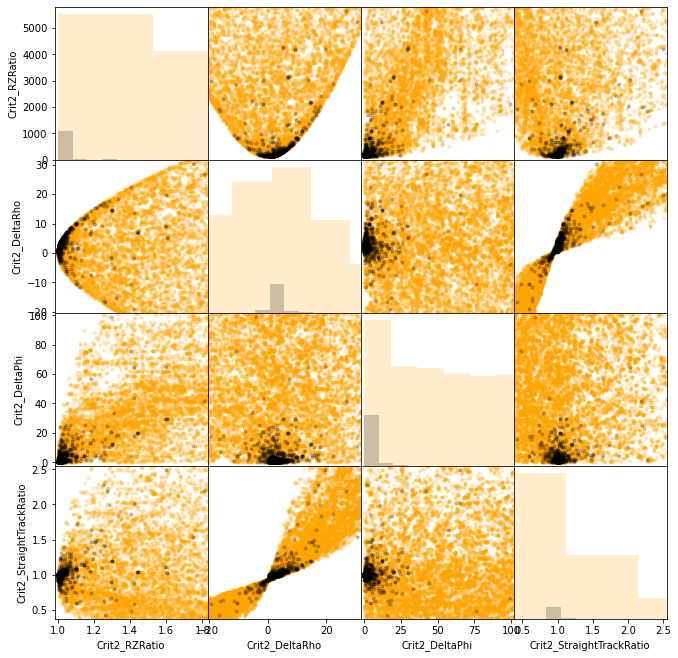

In [43]:
import matplotlib as mpl
def create_plot(
    axes,
    df=None,
    diagonal="hist",
    density_kwds=None,
    hist_kwds=None,
    marker='.',
    alpha=0.2,
    color="blue",
    **kwds
    ):
    range_padding = 0.05
    hist_kwds = hist_kwds or {}
    density_kwds = density_kwds or {}
    
    ## fix input data
    mask = pd.notna(df)

    boundaries_list = []
    for a in df.columns:
        values = df[a].values[mask[a].values]
        rmin_, rmax_ = np.min(values), np.max(values)
        rdelta_ext = (rmax_ - rmin_) * range_padding / 2.0
        boundaries_list.append((rmin_ - rdelta_ext, rmax_ + rdelta_ext))

    ## iterate over columns
    for i, a in enumerate(df.columns):
        for j, b in enumerate(df.columns):
            ax=axes[i,j] ## to abbreviate the code
            
            if i == j:
                values = df[a].values[mask[a].values]

                # Deal with the diagonal by drawing a histogram there.
                if diagonal == "hist":
                    ax.hist(values,color=color,alpha=alpha, **hist_kwds)

                elif diagonal in ("kde", "density"):
                    from scipy.stats import gaussian_kde

                    y = values
                    gkde = gaussian_kde(y)
                    ind = np.linspace(y.min(), y.max(), 1000)
                    ax.plot(ind, gkde.evaluate(ind),color=color, **density_kwds)

                ax.set_xlim(boundaries_list[i])

            else:
                common = (mask[a] & mask[b]).values

                ax.scatter(
                    df[b][common], df[a][common], marker=marker, alpha=alpha, color=color, **kwds
                )

                ax.set_xlim(boundaries_list[j])
                ax.set_ylim(boundaries_list[i])

            ax.set_xlabel(b)
            ax.set_ylabel(a)

            if j != 0:
                ax.yaxis.set_visible(False)
            if i != n - 1:
                ax.xaxis.set_visible(False)  
    return


## create the figure
fig=plt.figure(figsize=(10,10))

## get the matrix size from the first datasest
n = hit2_obs['true'].columns.size
print(f"-- creating a {n}x{n} matrix of plots --")

## create the axes
axes={}
gs = mpl.gridspec.GridSpec(n,n,
    left=0.12,right=.97,
    bottom=0.12,top=.97,
    wspace=0,hspace=0,
)
for i, a in enumerate(hit2_obs['false'].columns):
    for j, b in enumerate(hit2_obs['false'].columns):
        axes[i,j] = plt.subplot(gs[i, j])


create_plot(axes,df=hit2_obs['false'],color="orange")
create_plot(axes,df=hit2_obs['true'],color="black")
plt.savefig('hit_crit2_obs.png', dpi = 100)
plt.show()


-- creating a 3x3 matrix of plots --


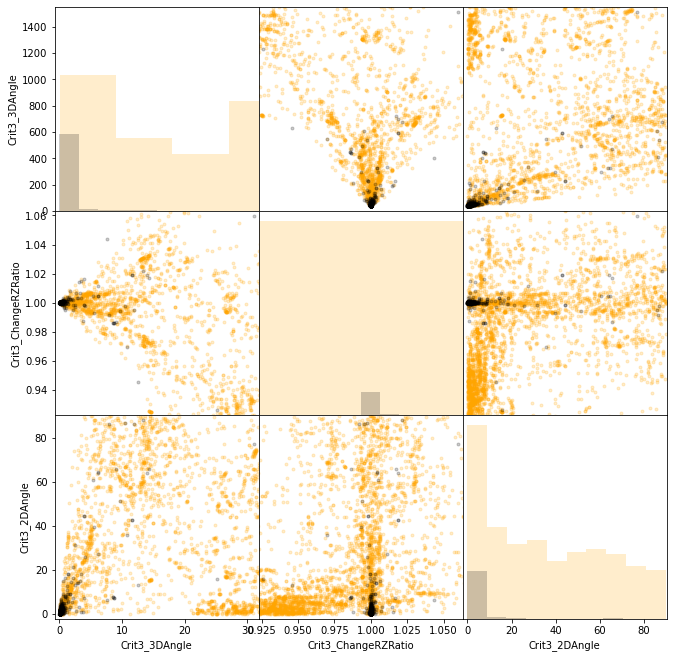

In [42]:
## create the figure
fig=plt.figure(figsize=(10,10))

## get the matrix size from the first datasest
n = hit3_obs['true'].columns.size
print(f"-- creating a {n}x{n} matrix of plots --")

## create the axes
axes={}
gs = mpl.gridspec.GridSpec(n,n,
    left=0.12,right=.97,
    bottom=0.12,top=.97,
    wspace=0,hspace=0,
)
for i, a in enumerate(hit3_obs['false'].columns):
    for j, b in enumerate(hit3_obs['false'].columns):
        axes[i,j] = plt.subplot(gs[i, j])


create_plot(axes,df=hit3_obs['false'],color="orange")
create_plot(axes,df=hit3_obs['true'],color="black")
plt.savefig('hit_crit3_obs.png', dpi = 100)
plt.show()


In [44]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [45]:
X2 = np.concatenate((hit2_obs['true'], hit2_obs['false']))
y2 = np.concatenate((np.ones(hit2_obs['true'].shape[0]),
                    np.zeros(hit2_obs['false'].shape[0])))
X3 = np.concatenate((hit3_obs['true'], hit3_obs['false']))
y3 = np.concatenate((np.ones(hit3_obs['true'].shape[0]),
                    np.zeros(hit3_obs['false'].shape[0])))

In [47]:
def correlations(data, **kwds):
    """Calculate pairwise correlation between features.
    
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of
    # correlation values if you do not need
    # the fancy plotting
    corrmat = data.corr(**kwds)

    fig, ax1 = plt.subplots(ncols=1, figsize=(10,10))
    
    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin': -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)

    ax1.set_title("Correlations")

    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)
        
    plt.tight_layout()


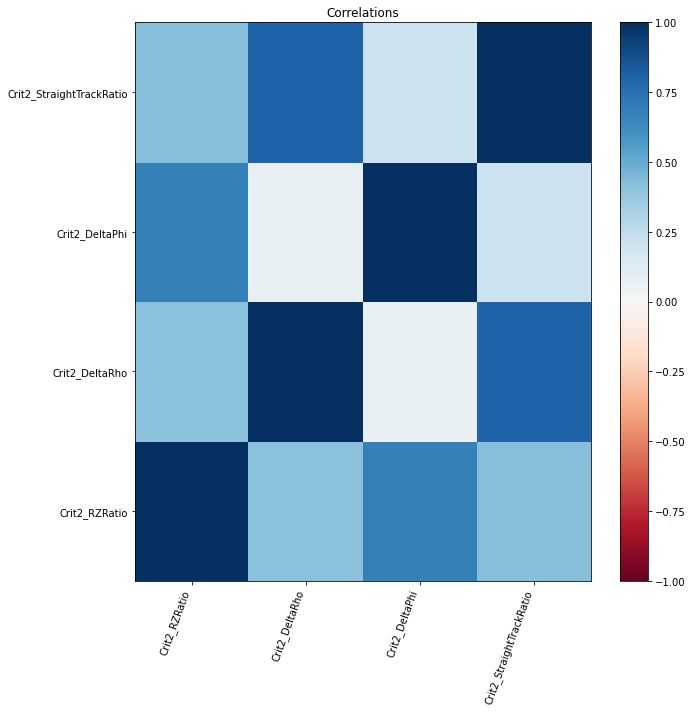

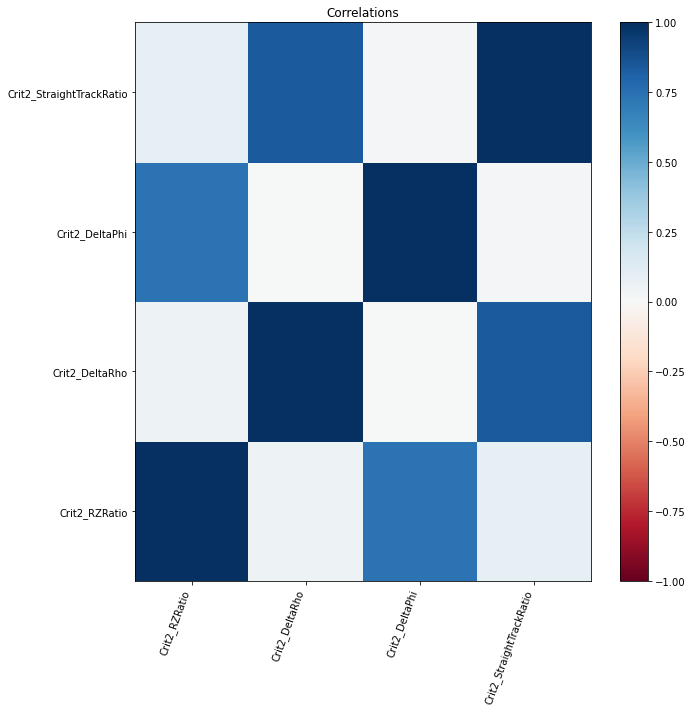

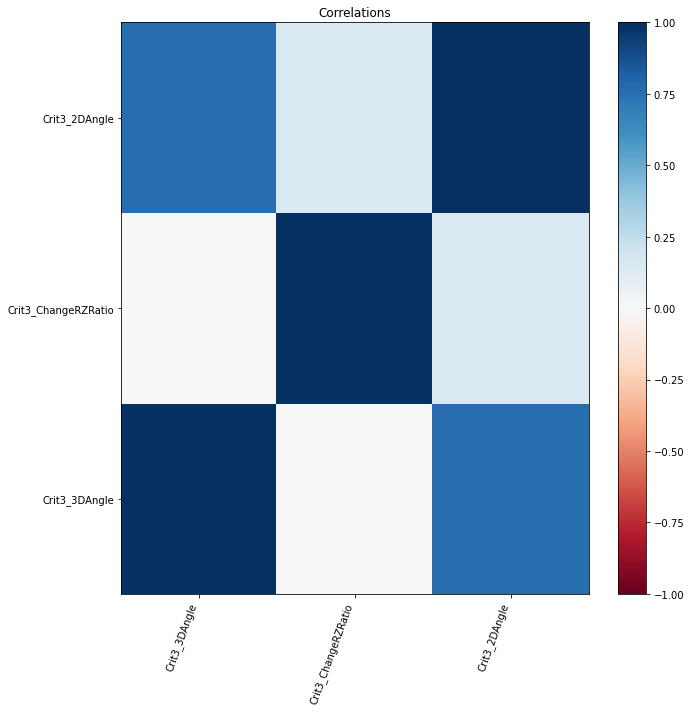

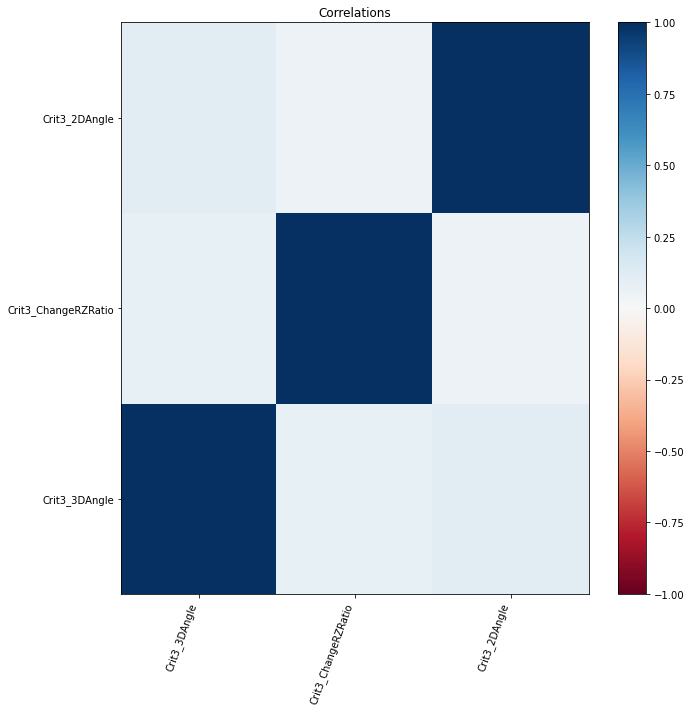

In [48]:
correlations(hit2_obs['true'])
correlations(hit2_obs['false'])
correlations(hit3_obs['true'])
correlations(hit3_obs['false'])

In [50]:
dt = DecisionTreeClassifier(max_depth=3)
bdt = AdaBoostClassifier(dt,
                         algorithm='SAMME',
                         n_estimators=800,
                         learning_rate=0.5)

bdt.fit(X2, y2)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=800)

In [54]:
y2_predicted = bdt.predict(X2)
print (classification_report(y2, y2_predicted, target_names=["false", "true"]))
print ("Area under ROC curve: %.4f"%(roc_auc_score(y2, bdt.decision_function(X2))))

              precision    recall  f1-score   support

       false       0.98      0.99      0.98     20599
        true       0.73      0.68      0.70      1182

    accuracy                           0.97     21781
   macro avg       0.85      0.83      0.84     21781
weighted avg       0.97      0.97      0.97     21781

Area under ROC curve: 0.9832
